#  Environmental analysis

![scheme](img01.jpg
)

RW: Raw Water before treatment

BC: Before Chlorination

FW: Finished Water 

DS1-DS3: tap water

PB1-PB2: biofilm in pipes

WM: biofilm in water meters

We are going to study the variation of microbial populations before entering the circuit (RW), at the end of the treatment (FW) and tap water samples in three houses (DS1, DS2 and DS3). We will also study samples taken in June and July. 

I propose you to run the pipeline I showed you in Unit 2 whit this dataset and answer the following questions:

1)	How many reads have we got for each sample?

2)	Which is the trimming length you are using for the denoising step?

3)	How many ASVs do you have before filtering deblur-table? And after filtering? 

4)	Which is the average frequency of sequences per sample before filtering deblur table?

5)	Which is the sample with the lower number of sequences after filtering deblur table? And the one with the highest number?

6)	Which is the most abundant phylum in each sample?

7)	Has the study enough coverage to allow us to make any statistical inference on communities’ diversity?

8)	Studying the Unifrac Weighted PCoA plot. Is there any effect of water treatment or sampling moment on the bacteria communities? 

9)	If we compare Untreated samples (RW) vs Treated samples (FW, DS1, DS2, DS3) which are the Phyla or Classes explaining the differences among both groups? (Hint: use LEfSe)

**Dataset Contents**:

1)	fastq folder: raw sample sequences

2)	85_otus.fasta and 85_otus_taxonomy.txt: taxonomy database

3)	metadata.txt: sample metadata. I have included some columns useful for diversity analyses.

4)	primers.txt: information on primers used for 16S PCR amplification

5)	quiz.docx: this file

6)	samplemanifest: manifest file with information of the ubication of  fastq files and their corresponding tags.

## Summary Pipeline

We have two *fastqc* files to process, corresponding to the paired ends reads of the virome *Vir1_100k* containing $100,000$ paired end reads from the same saliva sample. After purification of viral particles.

*Note 1: modify the MINLEN argument considering the original read length.*

*Note 2: try to optimize de novo assembly using metaspades.py and comparing at least 4 kmer strategies with QUAST. You do not have a reference genome in this case.*

The detailed pipeline is developed in chapter 2.

Here we show the relevant information.

### Preprocessing and quality check


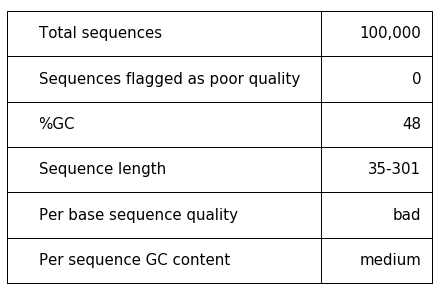

In [284]:
plt.figure(figsize=(2,5))
plt.axis('off')
table = plt.table(cellText=df_qual.values, rowLabels=df_qual.index, colWidths = [0.3]*len(df_qual.columns), 
          loc='top', cellLoc = 'right', rowLoc = 'left', bbox=[0,0,1,1]);
table.auto_set_font_size(False)
table.set_fontsize(15)

### Trimming and decontaminating
#### Kneaddata summary

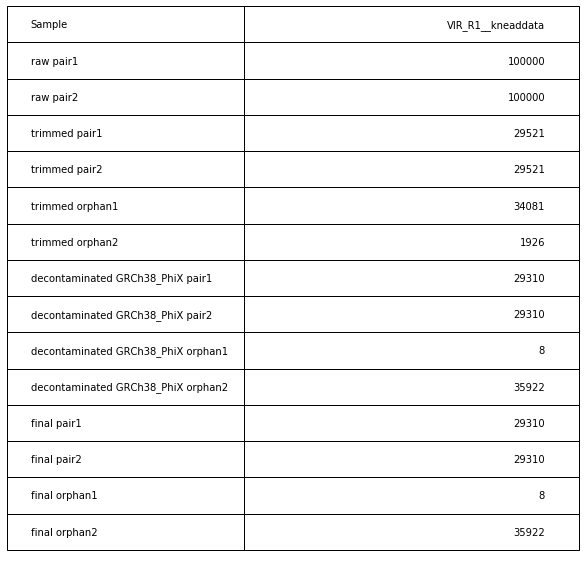

In [258]:
plt.figure(figsize=(3,5))
plt.axis('off')
plt.table(cellText=df_knead.values, rowLabels=df_knead.index, colWidths = [1]*len(df_knead.columns), loc='top', cellLoc = 'right', rowLoc = 'left', bbox=[0,0,2,2]);

#### Quality check 



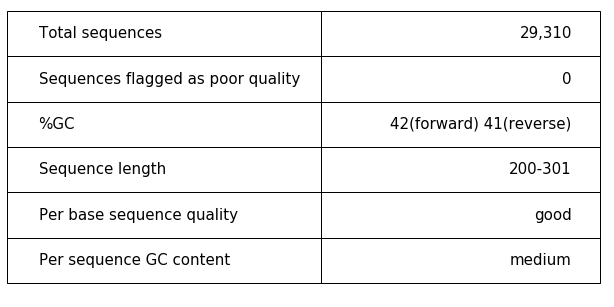

In [287]:
plt.figure(figsize=(5,5))
plt.axis('off')
table = plt.table(cellText=df_high_qual.values, rowLabels=df_high_qual.index, colWidths = [0.3]*len(df_high_qual.columns), 
          loc='top', cellLoc = 'right', rowLoc = 'left', bbox=[0,0,1,1]);
table.auto_set_font_size(False)
table.set_fontsize(15)

### Assembly(spades). Quast results.

These are the quast results for the spades process comparing assemblies of k-mers of length 25, 35 and 45, and not informing k-mer to spades program.

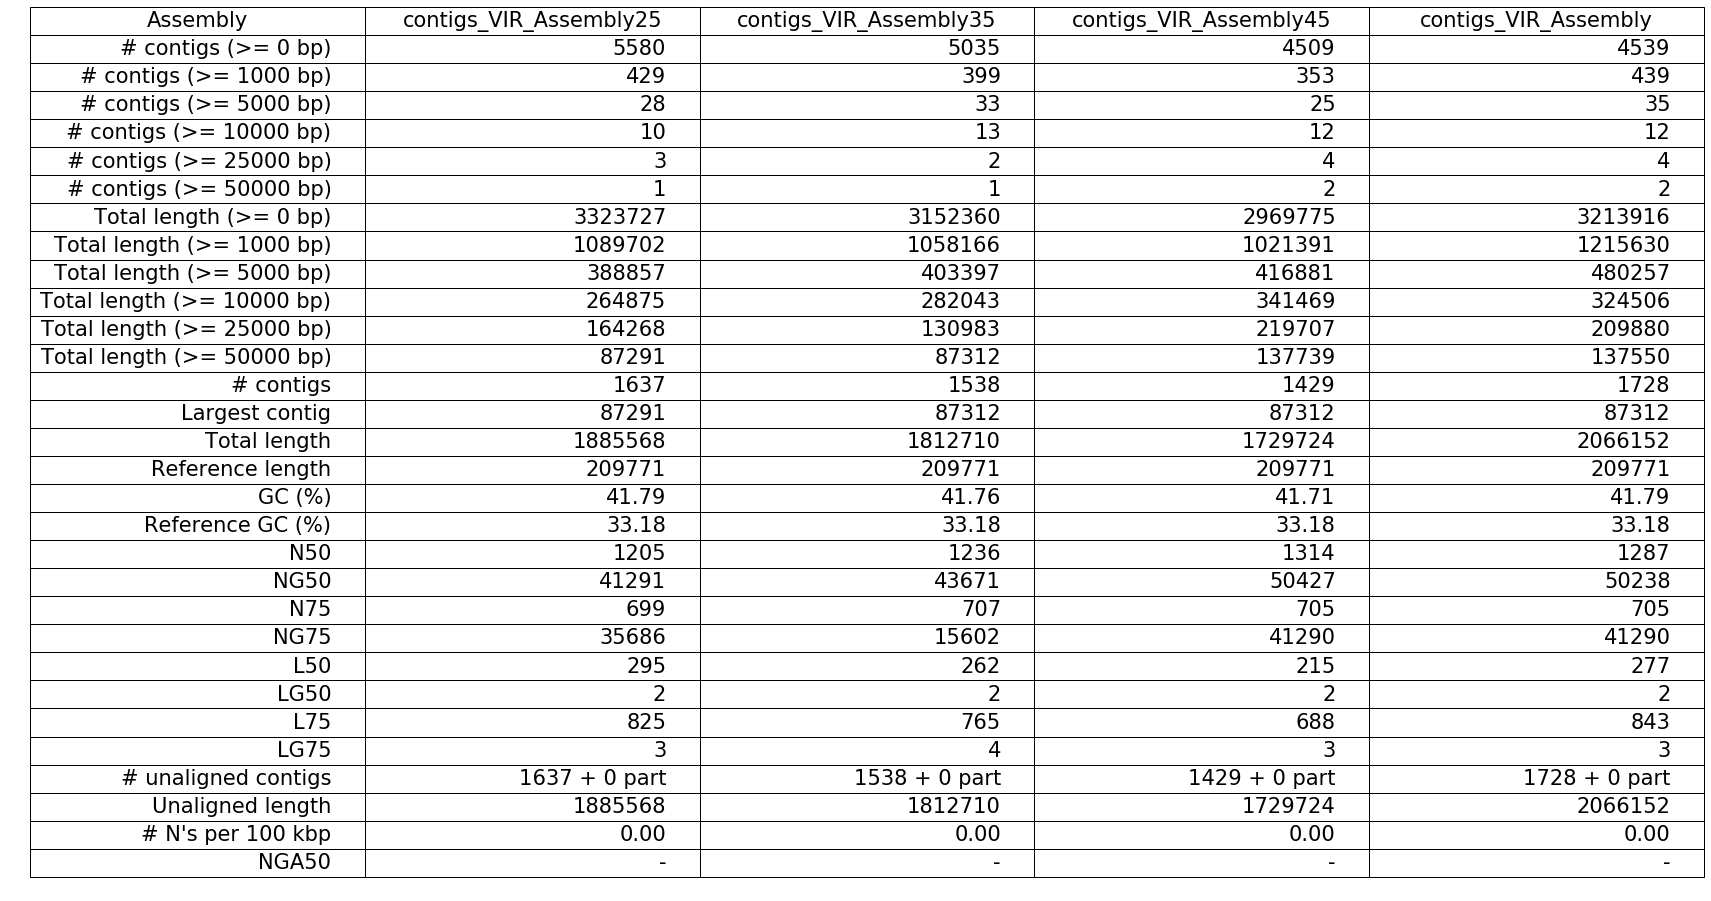

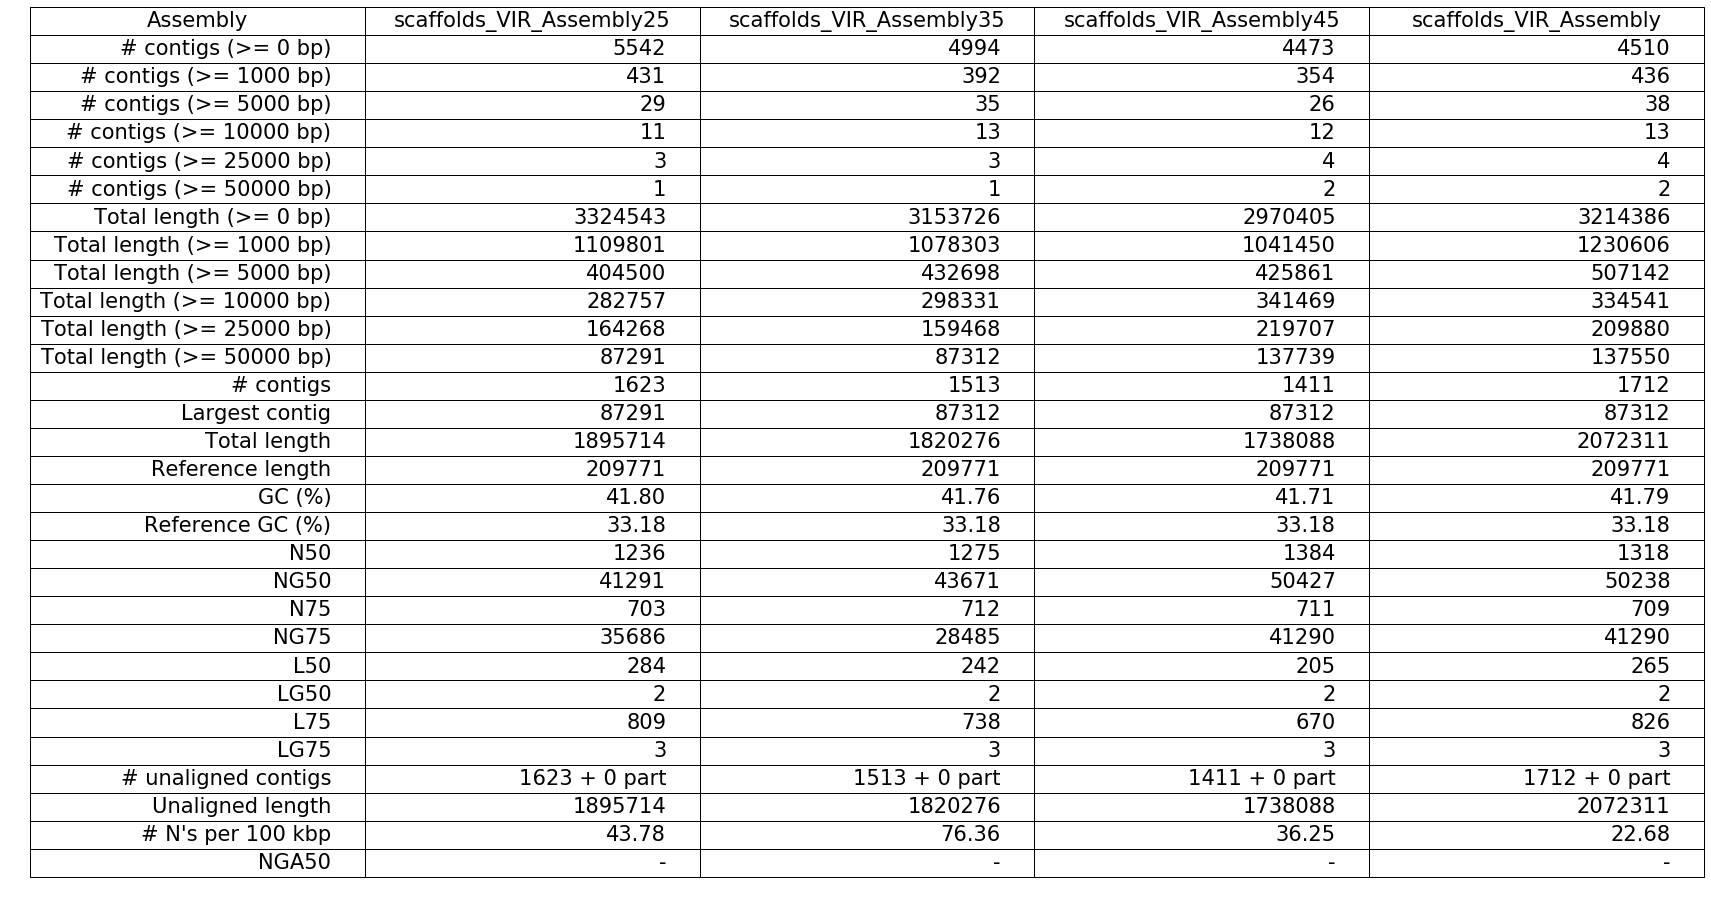

In [259]:
df_quast_contigs = df_quast.iloc[:,0:5]
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.axis('off')
table = plt.table(cellText=df_quast_contigs.values, colLabels=df_quast_contigs.columns, 
          colWidths = [2]*len(df_quast_contigs.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

table.auto_set_font_size(False)
table.set_fontsize(21)

df_quast_scaffolds = df_quast.iloc[:,[0,5,6,7,8]]
plt.figure(figsize=(15,8))
plt.axis('off')
table = plt.table(cellText=df_quast_scaffolds.values, colLabels=df_quast_scaffolds.columns, 
          colWidths = [2]*len(df_quast_scaffolds.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

table.auto_set_font_size(False)
table.set_fontsize(21)

### Assembly(metaspades). Quast results.

These are the quast results for the meta-spades process comparing assemblies of k-mers of length 25, 35 and 45, and not informing k-mer to spades program.

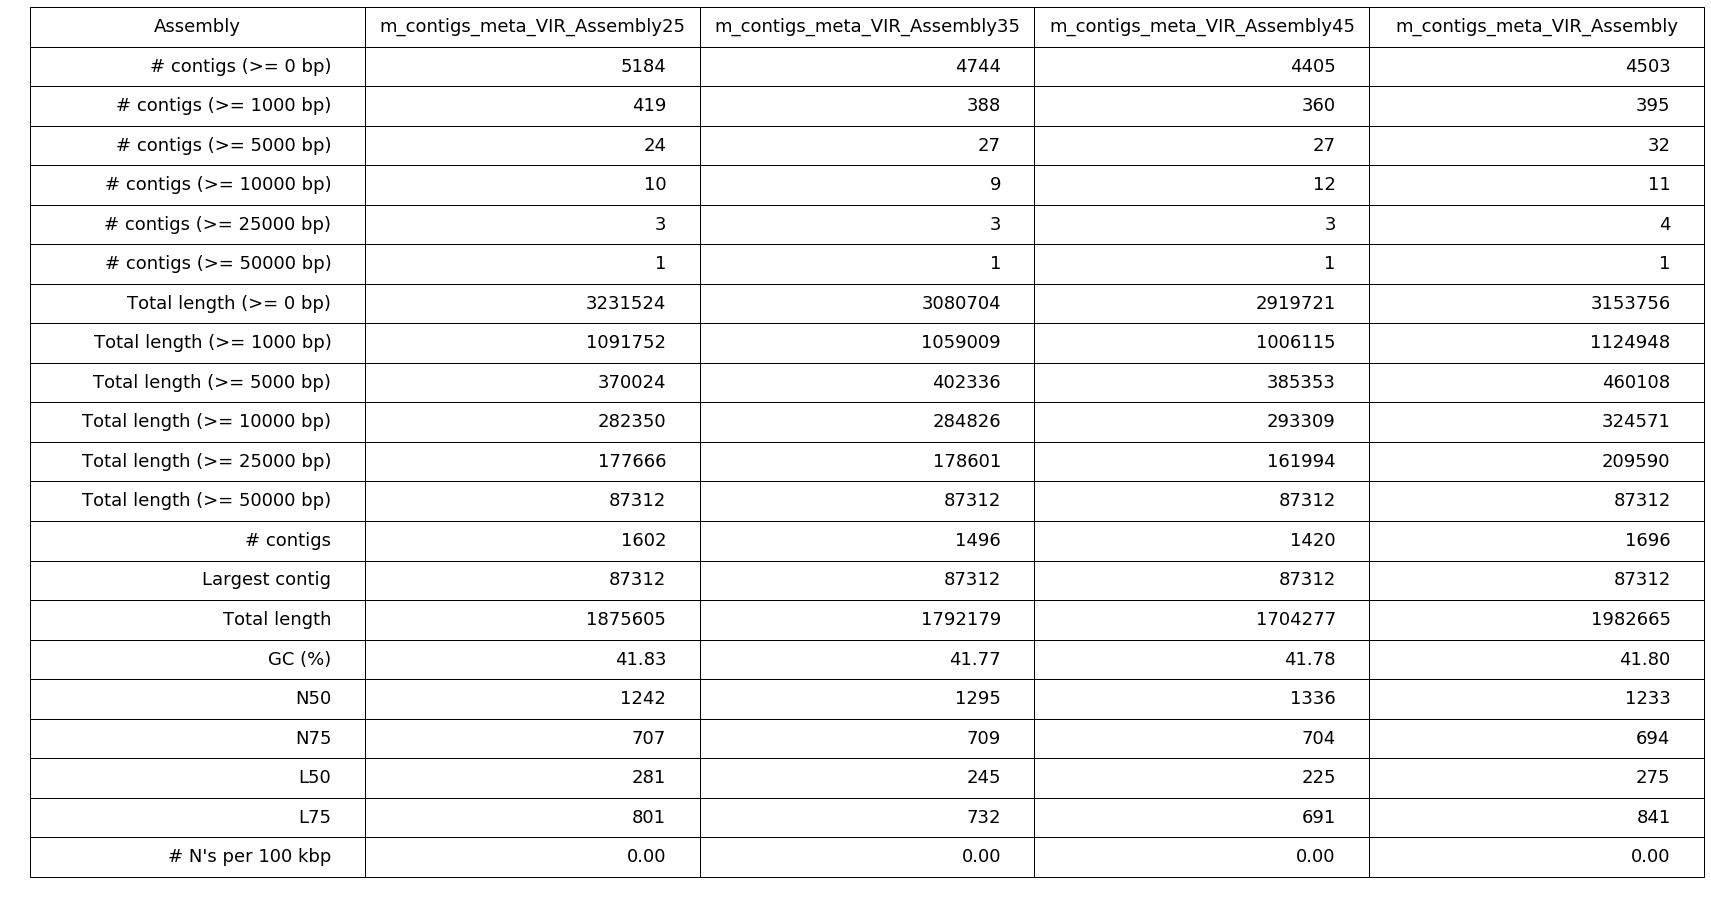

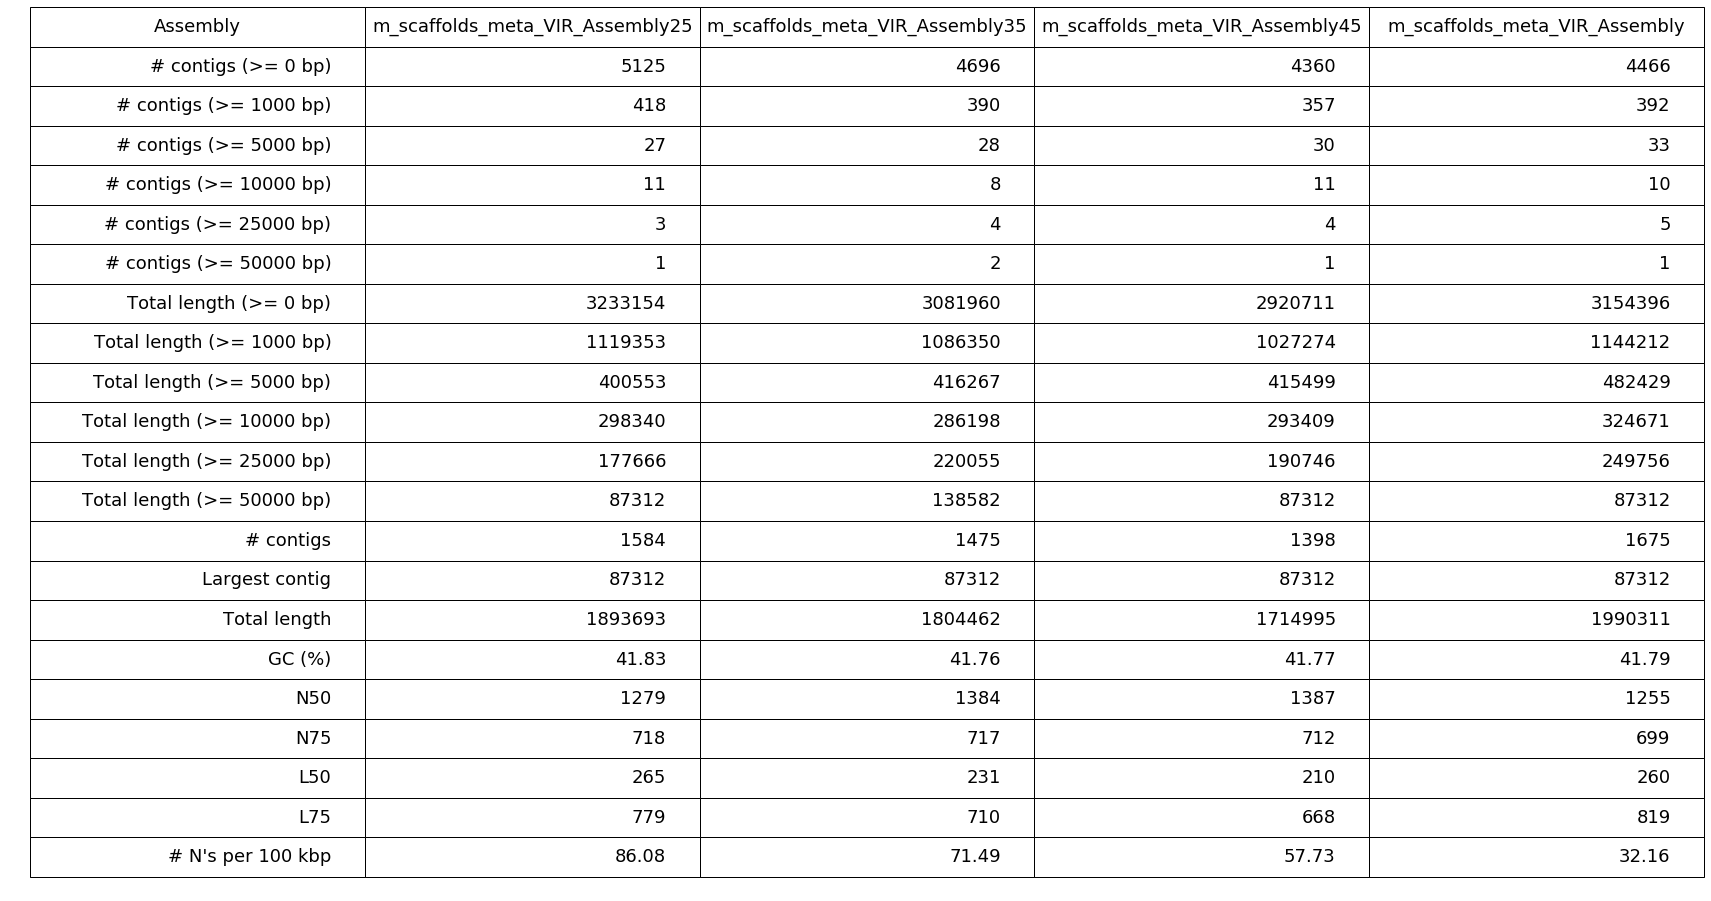

In [234]:
df_quast_contigs = df_quast_meta.iloc[:,0:5]
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.axis('off')
table = plt.table(cellText=df_quast_contigs.values, colLabels=df_quast_contigs.columns, 
          colWidths = [2]*len(df_quast_contigs.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

table.auto_set_font_size(False)
table.set_fontsize(18)

df_quast_scaffolds = df_quast_meta.iloc[:,[0,5,6,7,8]]
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.axis('off')
table = plt.table(cellText=df_quast_scaffolds.values, colLabels=df_quast_scaffolds.columns, 
          colWidths = [2]*len(df_quast_scaffolds.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

table.auto_set_font_size(False)
table.set_fontsize(18)

## Summary

In the first step we check the files in order to detect any error:expected read length (100,000), file format (fastq). Also we substitute spaces by underscores in fastq heads, because of the programs, cut the headers after the first space avoiding to distinguish between forward and reverse.

After we perform a fast quality check, with the results printed in (1.1.1). Per base sequence quality is no good, so we expect so we go to the next step: trimming and decontaminating.

We use *kneaddata* over the forward(R1) and reverse(R2) pairs files. First it runs *trimmomatic* to trim and crop the reads and to remove adapters. We use the trimming sliding window option: starts scanning at the 5-end and clips the read once the average quality within the window falls below a threshold. And also the *MINLEN* parameter: drop the read if it is below a specified length. We use a conservative length of 200 bp.

After that it runs *bowtie2* to delete the contaminant sequences: we use a reference database to delete reads that map to the human or PhiX genomes. PhiX is a control frequently used during Illumina sequencing runs.

After this execution (stats on 1.1.2.1) we end by 29,310 sequences. We check the coherence number of reads on resulting files with the statistics.

We pass a quality check and that evidences a improvement of the per base sequence quality. Aldo a certain loss of %GC but not relevant.

We use *spades* for the assembly in single cell parameter with a reference genome, with four executions with different assembly lengths: 25, 35, 55 and let the parameter free to the program.

We use *quast* for comparison of genome assembly outputs (1.1.3). The best N50 score correspond to a contig length of 45.

We perform a second run of assembly with *metaspades*, with results on(1.1.4) and now without a reference genome. We have a lesser detection of contigs and scaffolds. The scores (N50 and so on) are very similar to spades.

*NOTE: Pipeline is completely executable in this notebook with the changes necessary to adapt to a new environment. The terminal commands are directed to the virtual machine by ssh connection as the notebook is executed on host machine to use the configurations on notebook, latex and so on that I have there.*

In [129]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
#FILE_ID = "ECTV"
#FASTQ_STR = "@HWUSI-EAS1752R"
#MIN_LEN = "70"

FILE_ID = "VIR"
FASTQ_STR = "@M02255"
MIN_LEN = "200"

## Detailed pipeline

In [ ]:
%%bash
#Alignment and phylogeny
mkdir tree_out

qiime alignment mafft --i-sequences deblur_output/rep_seqs_filt.qza \
                      --p-n-threads 3 \
                      --o-alignment tree_out/rep_seqs_filt_aligned.qza

qiime alignment mask --i-alignment tree_out/rep_seqs_filt_aligned.qza \
                     --o-masked-alignment tree_out/rep_seqs_filt_aligned_masked.qza

qiime phylogeny fasttree --i-alignment tree_out/rep_seqs_filt_aligned_masked.qza \
                         --p-n-threads 2 \
                         --o-tree tree_out/rep_seqs_filt_aligned_masked_tree

qiime phylogeny midpoint-root --i-tree tree_out/rep_seqs_filt_aligned_masked_tree.qza \
                              --o-rooted-tree tree_out/rep_seqs_filt_aligned_masked_tree_rooted.qza

#Training database
qiime tools import \
  --type 'FeatureData[Sequence]' \
  --input-path 85_otus.fasta \
  --output-path 85_otus.qza

qiime tools import \
  --type 'FeatureData[Taxonomy]' \
  --input-format HeaderlessTSVTaxonomyFormat \
  --input-path 85_otu_taxonomy.txt \
  --output-path ref-taxonomy.qza

qiime feature-classifier extract-reads \
  --i-sequences 85_otus.qza \
  --p-f-primer AACMGGATTAGATACCCKG \
  --p-r-primer ACGTCATCCCCACCTTCC \
  --p-min-length 100 \
  --p-max-length 400 \
  --o-reads ref-seqs.qza

qiime feature-classifier fit-classifier-naive-bayes \
  --i-reference-reads ref-seqs.qza \
  --i-reference-taxonomy ref-taxonomy.qza \
  --o-classifier classifier.qza

#Taxonomic assignation

qiime feature-classifier classify-sklearn --i-reads deblur_output/rep_seqs_filt.qza \
                                          --i-classifier classifier.qza \
                                          --p-n-jobs 2 \
                                          --output-dir taxa

qiime tools export --input-path taxa/classification.qza --output-path taxa

qiime taxa barplot --i-table deblur_output/deblur_table_filt.qza \
                   --i-taxonomy taxa/classification.qza \
                   --m-metadata-file metadata.txt \
                   --o-visualization taxa/taxa_barplot.qzv

qiime feature-table group --i-table deblur_output/deblur_table_filt.qza \
                          --p-axis sample \
                          --p-mode sum \
                          --m-metadata-file metadata.txt \
                          --m-metadata-column Plant \
                          --o-grouped-table deblur_output/deblur_table_filt_Plant.qza

qiime taxa barplot --i-table deblur_output/deblur_table_filt_Plant.qza \
                   --i-taxonomy taxa/classification.qza \
                   --m-metadata-file metadata.txt \
                   --o-visualization taxa/taxa_barplot_Plant.qzv

#Diversity

qiime diversity alpha-rarefaction --i-table deblur_output/deblur_table_filt.qza \
                                  --p-max-depth 5496 \
                                  --p-steps 20 \
                                  --i-phylogeny tree_out/rep_seqs_filt_aligned_masked_tree_rooted.qza \
                                  --m-metadata-file metadata.txt \
                                  --o-visualization rarefaction_curves.qzv

qiime diversity core-metrics-phylogenetic --i-table deblur_output/deblur_table_filt.qza \
                                          --i-phylogeny tree_out/rep_seqs_filt_aligned_masked_tree_rooted.qza \
                                          --p-sampling-depth 1411 \
                                          --m-metadata-file metadata.txt \
                                          --p-n-jobs 2 \
                                          --output-dir diversity

qiime diversity alpha-group-significance --i-alpha-diversity diversity/shannon_vector.qza \
                                         --m-metadata-file metadata.txt \
                                         --o-visualization diversity/shannon_compare_groups.qzv

#Differential Abundance
#Ancom

qiime taxa collapse \
  --i-table deblur_output/deblur_table_filt.qza \
  --i-taxonomy taxa/classification.qza \
  --p-level 6 \
  --o-collapsed-table deblur_output/deblur_collapsed.qza

qiime composition add-pseudocount \
  --i-table deblur_output/deblur_collapsed.qza \
  --o-composition-table deblur_output/comp-deblur-l6.qza

qiime composition ancom \
  --i-table deblur_output/comp-deblur-l6.qza \
  --m-metadata-file metadata.txt \
  --m-metadata-column Plant \
  --o-visualization deblur_output/l6-ancom-Subject.qzv

#LEFSe

qiime taxa collapse --i-table deblur_output/deblur_table_filt.qza \
                    --o-collapsed-table deblur_output/L3_collapse_table.qza \
                    --p-level 3 \
                    --i-taxonomy taxa/classification.qza

qiime tools export --input-path deblur_output/L3_collapse_table.qza \
                   --output-path lefse_table/

biom convert -i lefse_table/feature-table.biom \
             -o lefse_table/feature-table.txt \
             --header-key “taxonomy” --to-tsv

### Preprocessing and quality check


In [5]:
FILE_ID = "SRR"
FASTQ_STR = "@SRR"

In [6]:
%%bash -s "$FILE_ID" "$FASTQ_STR"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
echo "#### Check files FILE_ID=${FILE_ID}, FASTQ_STR=$FASTQ_STR"
cd Documentos/Tema_2/fastq
head -4 ${FILE_ID}*fastq
grep -c $FASTQ_STR ${FILE_ID}*fastq

#echo "#### Compute quality"
#mkdir ${FILE_ID}_Quality
#fastqc ${FILE_ID}_R1.fastq -o ${FILE_ID}_Quality/
#fastqc ${FILE_ID}_R2.fastq -o ${FILE_ID}_Quality/
#
#echo "#### Replace ' ' by '_' in header"
#head -n 1 ${FILE_ID}*fastq
#cat ${FILE_ID}_R1.fastq | sed 's/ /_/g' > ${FILE_ID}_R1_.fastq
#cat ${FILE_ID}_R2.fastq | sed 's/ /_/g' > ${FILE_ID}_R2_.fastq
#head -n 1 ${FILE_ID}*fastq
EOT

#### Check files FILE_ID=SRR, FASTQ_STR=@SRR
==> SRR3593621_1.fastq <==
@SRR3593621.1 1 length=300
TACGTAGGGTGCAAGCGTTATCCGGATTCACTGTTCTTCCCTATTCGTTTAGTTTTTTTTTTCCTTCTCACTTCACAGCCCTTTGCTTTACCTCGTCCTTCTTTTCTTCTTTACTATACTCGTTTTTTATATTTGTACGTGGTTCTCCTTTTTGTTCTGTGCCTTGCGTTGTGTTCTTGTTGTACCCCAATTGCCATTGCTCCTTTCTTCTTCATTCCTGTCACTCTTCCACGCAAGCTATCGTACTCCATCAGTTTAGTCCCCTCCTTTTTTCTAGCCCTCAACTCTTCCCTGCTAGTT
+SRR3593621.1 1 length=300
<6BCCGGGGGGGGGGGGGG7CEE6+,8@@,;C,,,<,<,,,,,,;6,;,6,,,;-,:+8+86,,,<9,:,6CE,,,,,,66,,,,,5:,,6696,,8,89,,,9,<,,,,9,,,:,<,,95+,+++9+,9,,,,,,,,+,,+++:>;,74,4,+,,5,,8,,,,8,,+66+++,66,7,,,,,,:,:5++,,+2,,,,+3+74<2=2@,,+22,5,5*4+,4*/5++++3*.)*)((//++(-(((*+*))+)))3.)))++,/;*/(/)//587))6((,(*),-.).)-44)43)).-

==> SRR3593621_2.fastq <==
@SRR3593621.1 1 length=300
TTTCCTCTTTCTCTCTTCCTCCCCACCCTTCCTCCTTCCCTCTTTCTCTTCCTTCTCTCCTCACATTCTCCTCCCTCCCCTGCTTCCCTTTATTTCTCCCTCTACTCCTCTCTCTTCTCTGCTTCTCTCCTCTACCTTTCGTTTCTCAGTGTCATCTATTTCCCTGCCCGTTGCCTTCTCCTTTCTTCTTCCTCCTCATCTCCACTCATTTCACTTC

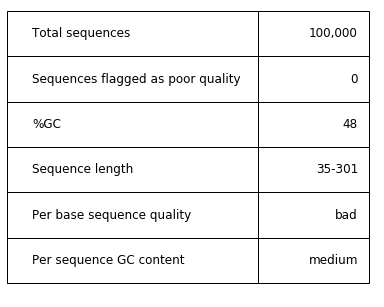

In [290]:
df_qual = pd.DataFrame(data=['100,000', '0', '48', '35-301', 'bad', 'medium'], 
                       index = ['Total sequences', 'Sequences flagged as poor quality', '%GC', 
                      'Sequence length', 'Per base sequence quality','Per sequence GC content'])
plt.figure(figsize=(2,5))
plt.axis('off')
table = plt.table(cellText=df_qual.values, rowLabels=df_qual.index, colWidths = [0.3]*len(df_qual.columns), 
          loc='top', cellLoc = 'right', rowLoc = 'left', bbox=[0,0,1,1]);
table.auto_set_font_size(False)
table.set_fontsize(12)

### Trimming and decontaminating
Trimming poor quality ends and short sequences (**Trimmomatic**) and removal of reads aligning to the human and phiX174 genomes (***bowtie2**). The later one is a contaminant used as spike by Illumina kits to control quality of the sequencing process.

We are only filtering only R1 files because forward reads have usually better quality than reverse reads. 

#### Process

In [63]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
echo "#### Trimming and decontaminating FILE_ID=${FILE_ID} MIN_LEN=${MIN_LEN}"
kneaddata -i ${FILE_ID}_R1_.fastq -i ${FILE_ID}_R2_.fastq \
-o kneaddata_out_${FILE_ID} -db /home/shared/bowtiedb/GRCh38_PhiX \
--trimmomatic /home/microbioinf/miniconda3/pkgs/trimmomatic-0.38-1/share/trimmomatic-0.38-1/ \
-t 2 --trimmomatic-options "SLIDINGWINDOW:4:20 MINLEN:${MIN_LEN}" \
--bowtie2-options "--very-sensitive --dovetail" --remove-intermediate-output
EOT

#### Trimming and decontaminating FILE_ID=VIR MIN_LEN=200
Initial number of reads ( /home/microbioinf/Documentos/Tema_3/VIR_R1_.fastq ): 100000
Initial number of reads ( /home/microbioinf/Documentos/Tema_3/VIR_R2_.fastq ): 100000
Running Trimmomatic ... 
Total reads after trimming ( /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR_R1__kneaddata.trimmed.1.fastq ): 29521
Total reads after trimming ( /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR_R1__kneaddata.trimmed.2.fastq ): 29521
Total reads after trimming ( /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR_R1__kneaddata.trimmed.single.1.fastq ): 34081
Total reads after trimming ( /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR_R1__kneaddata.trimmed.single.2.fastq ): 1926
Decontaminating ...
Running bowtie2 ... 
Total reads after removing those found in reference database ( /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR_R1__kneaddata_GRCh38_PhiX_bowtie2_paired_clean_1.fastq ): 29310
To

#### Process statistics

In [64]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
cat ${FILE_ID}_R1*log
kneaddata_read_count_table --input ./ --output kneaddata_read_counts.txt 
grep -c $FASTQ_STR ${FILE_ID}*fastq

04/27/2019 11:36:19 AM - kneaddata.knead_data - INFO: Running kneaddata v0.6.1
04/27/2019 11:36:19 AM - kneaddata.knead_data - INFO: Output files will be written to: /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR
04/27/2019 11:36:19 AM - kneaddata.knead_data - DEBUG: Running with the following arguments: 
verbose = False
bmtagger_path = None
minscore = 50
bowtie2_path = /home/microbioinf/miniconda3/bin/bowtie2
maxperiod = 500
no_discordant = False
serial = False
fastqc_start = False
bmtagger = False
cat_final_output = False
log_level = DEBUG
log = /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR_R1__kneaddata.log
max_memory = 500m
remove_intermediate_output = True
fastqc_path = None
output_dir = /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR
trf_path = None
remove_temp_output = True
reference_db = /home/shared/bowtiedb/GRCh38_PhiX
input = /home/microbioinf/Documentos/Tema_3/VIR_R1_.fastq /home/microbioinf/Documentos/Tema_3/VIR_R2_.fastq
pi = 10
reorder = False
pm

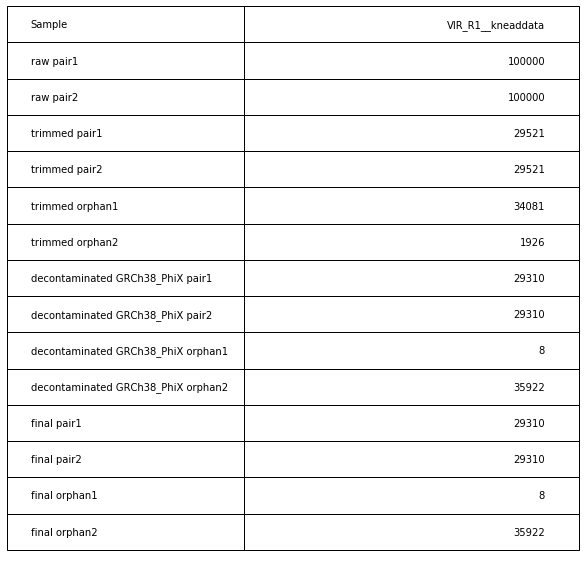

In [141]:
data = """
cat Documentos/Tema_3/kneaddata_out_%s/kneaddata_read_counts.txt
EOT
""" % FILE_ID 
output = !ssh microbioinf@192.168.56.101 /bin/bash <<"EOT" {data}

data = []
# To list of lists
for row in output:
    data.append(row.split('\t'))
# To dataframe
df_knead = pd.DataFrame(data[1:], columns=data[0])
df_knead.style.hide_index().set_properties(**{'text-align': 'right', 'font-family' : 'courier', 'color' : 'darkgreen', "font-size" : "11pt"}).\
set_properties(**{'text-align': 'right', 'font-family' : 'courier', 'color' : 'darkblue', "font-size" : "12pt"}, subset=['Sample'])
df_knead = df_knead.transpose()

fig = plt.figure(figsize=(3,5))
ax = plt.subplot(111)
ax.axis('off')
plt.table(cellText=df_knead.values, rowLabels=df_knead.index, colWidths = [1]*len(df_knead.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

#### Check number of reads

With grep we can identify the non-contaminated high-quality files

In [66]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
grep -c $FASTQ_STR ${FILE_ID}*fastq

VIR_R1__kneaddata_GRCh38_PhiX_bowtie2_paired_contam_1.fastq:183
VIR_R1__kneaddata_GRCh38_PhiX_bowtie2_paired_contam_2.fastq:183
VIR_R1__kneaddata_GRCh38_PhiX_bowtie2_unmatched_1_contam.fastq:20
VIR_R1__kneaddata_GRCh38_PhiX_bowtie2_unmatched_2_contam.fastq:113
VIR_R1__kneaddata_paired_1.fastq:29310
VIR_R1__kneaddata_paired_2.fastq:29310
VIR_R1__kneaddata_unmatched_1.fastq:8
VIR_R1__kneaddata_unmatched_2.fastq:35922


#### Check quality

In [67]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
echo "#### Compute quality"
mkdir ${FILE_ID}_HighQuality
fastqc ${FILE_ID}_R1__kneaddata_paired_1.fastq -o ${FILE_ID}_HighQuality/
fastqc ${FILE_ID}_R1__kneaddata_paired_2.fastq -o ${FILE_ID}_HighQuality/

#### Compute quality
Analysis complete for VIR_R1__kneaddata_paired_1.fastq
Analysis complete for VIR_R1__kneaddata_paired_2.fastq


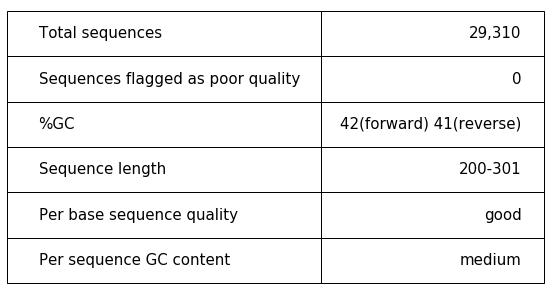

In [289]:
df_high_qual = pd.DataFrame(data=['29,310', '0', '42(forward) 41(reverse)', '200-301', 'good', 'medium'], 
                       index = ['Total sequences', 'Sequences flagged as poor quality', '%GC', 
                      'Sequence length', 'Per base sequence quality','Per sequence GC content'])
plt.figure(figsize=(4,5))
plt.axis('off')
table = plt.table(cellText=df_high_qual.values, rowLabels=df_high_qual.index, colWidths = [0.3]*len(df_high_qual.columns), 
          loc='top', cellLoc = 'right', rowLoc = 'left', bbox=[0,0,1,1]);
table.auto_set_font_size(False)
table.set_fontsize(15)

### Assembly (*spades*)

 We are going to use a Refseq database of viral proteins (around 100Mb) from ncbi (ftp://ftp.ncbi.nlm.nih.gov/refseq/release/viral/), and you have to download it in two separated files that can be joined into one with cat.
 
In this step we run command **spades** with the paired high-quality and free of known contaminants reads.

#### Process for different K_MER

In [68]:
K_MERS_LIST = ["25", "35", "45"]
K_MERS =  ",".join(K_MERS_LIST)
print(K_MERS)

25,35,45


In [69]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN" "$K_MERS"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 K_MERS=$4 2>/dev/null /bin/bash <<"EOT"

export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
echo "#### Compute assembly with no specified K_MER"
spades.py -1 ${FILE_ID}_R1__kneaddata_paired_1.fastq -2 ${FILE_ID}_R1__kneaddata_paired_2.fastq \
--sc -o ${FILE_ID}-Assembly${K_MER} 1>/dev/null
IFS=","
for K_MER in ${K_MERS}
do
echo "#### Compute assembly K_MER=${K_MER}"
spades.py -1 ${FILE_ID}_R1__kneaddata_paired_1.fastq -2 ${FILE_ID}_R1__kneaddata_paired_2.fastq \
--sc -k ${K_MER} -o ${FILE_ID}-Assembly${K_MER} 1>/dev/null
done
EOT

#### Compute assembly with no specified K_MER


In [70]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN" "$K_MERS"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 K_MERS=$4 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
echo "#### Spades log with no specified K_MER"
tail -15 ${FILE_ID}-Assembly${K_MER}/spades.log | head -n 11
echo " "
IFS=","
for K_MER in ${K_MERS}
do
echo "#### Spades log with K_MER=${K_MER}"
tail -15 ${FILE_ID}-Assembly${K_MER}/spades.log | head -n 11
done
EOT

#### Spades log with no specified K_MER
===== Assembling finished. Used k-mer sizes: 21, 33, 55 

 * Corrected reads are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR-Assembly/corrected/
 * Assembled contigs are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR-Assembly/contigs.fasta
 * Assembled scaffolds are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR-Assembly/scaffolds.fasta
 * Assembly graph is in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR-Assembly/assembly_graph.fastg
 * Assembly graph in GFA format is in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR-Assembly/assembly_graph_with_scaffolds.gfa
 * Paths in the assembly graph corresponding to the contigs are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR-Assembly/contigs.paths
 * Paths in the assembly graph corresponding to the scaffolds are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/VIR-Assembly/scaffolds.paths

======= SPAdes pipeline 

In [71]:
K_MERS_LIST = ["","25", "35", "45"]
K_MERS =  ",".join(K_MERS_LIST)
print(K_MERS)

,25,35,45


In [72]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN" "$K_MERS"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 K_MERS=$4 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
IFS=","
for K_MER in ${K_MERS}
do
    echo
    echo "#### Check output K_MER=${K_MER}"
    cd ${FILE_ID}-Assembly${K_MER}
    rep -c ">" *fasta
    grep ">" -m 8 contigs.fasta 
    grep ">" -m 8 scaffolds.fasta 
    grep "NN" *fasta
done


#### Check output K_MER=
>NODE_1_length_87312_cov_12.682593
>NODE_2_length_50238_cov_8.439731
>NODE_3_length_41290_cov_6.676319
>NODE_4_length_31040_cov_9.557496
>NODE_5_length_21751_cov_24.857531
>NODE_6_length_15576_cov_5.415630
>NODE_7_length_15551_cov_5.658363
>NODE_8_length_14173_cov_11.314563
>NODE_1_length_87312_cov_12.682593
>NODE_2_length_50238_cov_8.439731
>NODE_3_length_41290_cov_6.676319
>NODE_4_length_31040_cov_9.557496
>NODE_5_length_21751_cov_24.857531
>NODE_6_length_15576_cov_5.415630
>NODE_7_length_15551_cov_5.658363
>NODE_8_length_14173_cov_11.314563
scaffolds.fasta:TNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
scaffolds.fasta:NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGGTGCTGGTCAGCAAGGTA
scaffolds.fasta:TGCAGTAGTGCAGCTGGAATCAATCACAATCTTTGNNNNNNNNNNNNNNNNNNNNNNNNN
scaffolds.fasta:NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
scaffolds.fasta:NNNNNNNNNNNNNNNTAATTGCTGAACTCTCGTGCTGCAGTAGTGCAGCTGGAATCAATC
scaffolds.fasta:GAGCGNNNNNNNNNNAATCAATA

#### Comparison of assemblies (*quast*)

In [74]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN" "$K_MER"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 K_MER=$4 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
echo "#### Compare assemblies FILE_ID=${FILE_ID}"
for assembly in ${FILE_ID}-Assembly*; 
    do echo "Processing $assembly file..."; 
    cp ${assembly}/contigs.fasta contigs-${assembly}.fasta
    cp ${assembly}/scaffolds.fasta scaffolds-${assembly}.fasta
done
quast.py contigs* scaffolds* -R ../ECTV-MoscowGenome.fasta 1>/dev/null
EOT

#### Compare assemblies FILE_ID=VIR
Processing VIR-Assembly file...
Processing VIR-Assembly25 file...
Processing VIR-Assembly35 file...
Processing VIR-Assembly45 file...


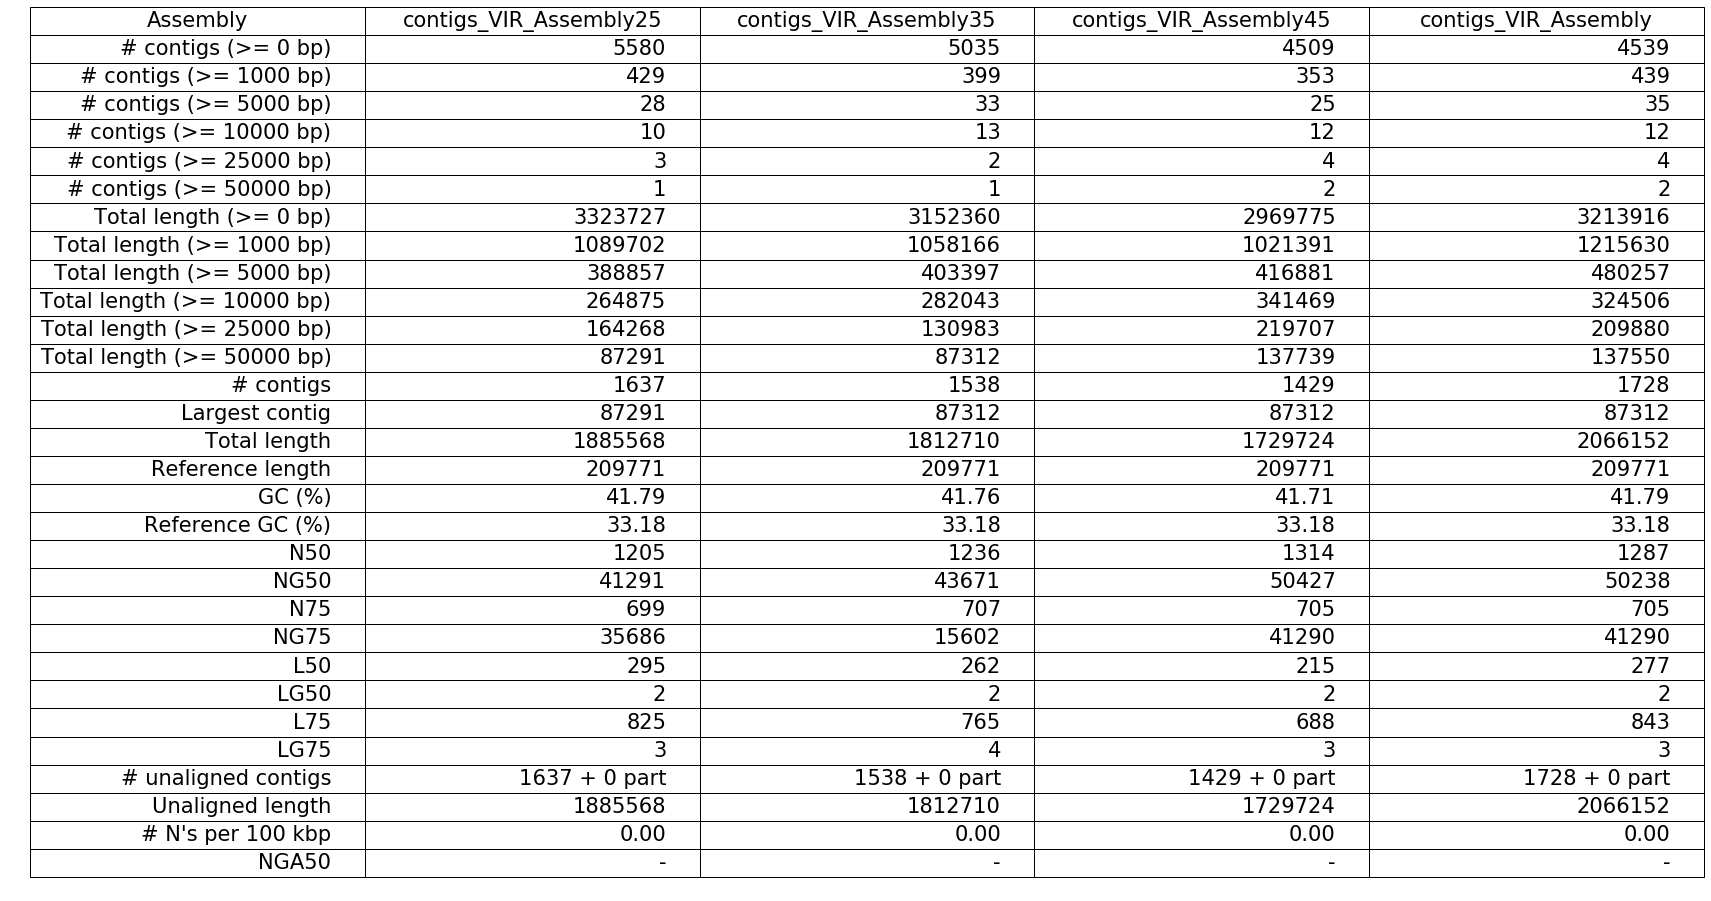

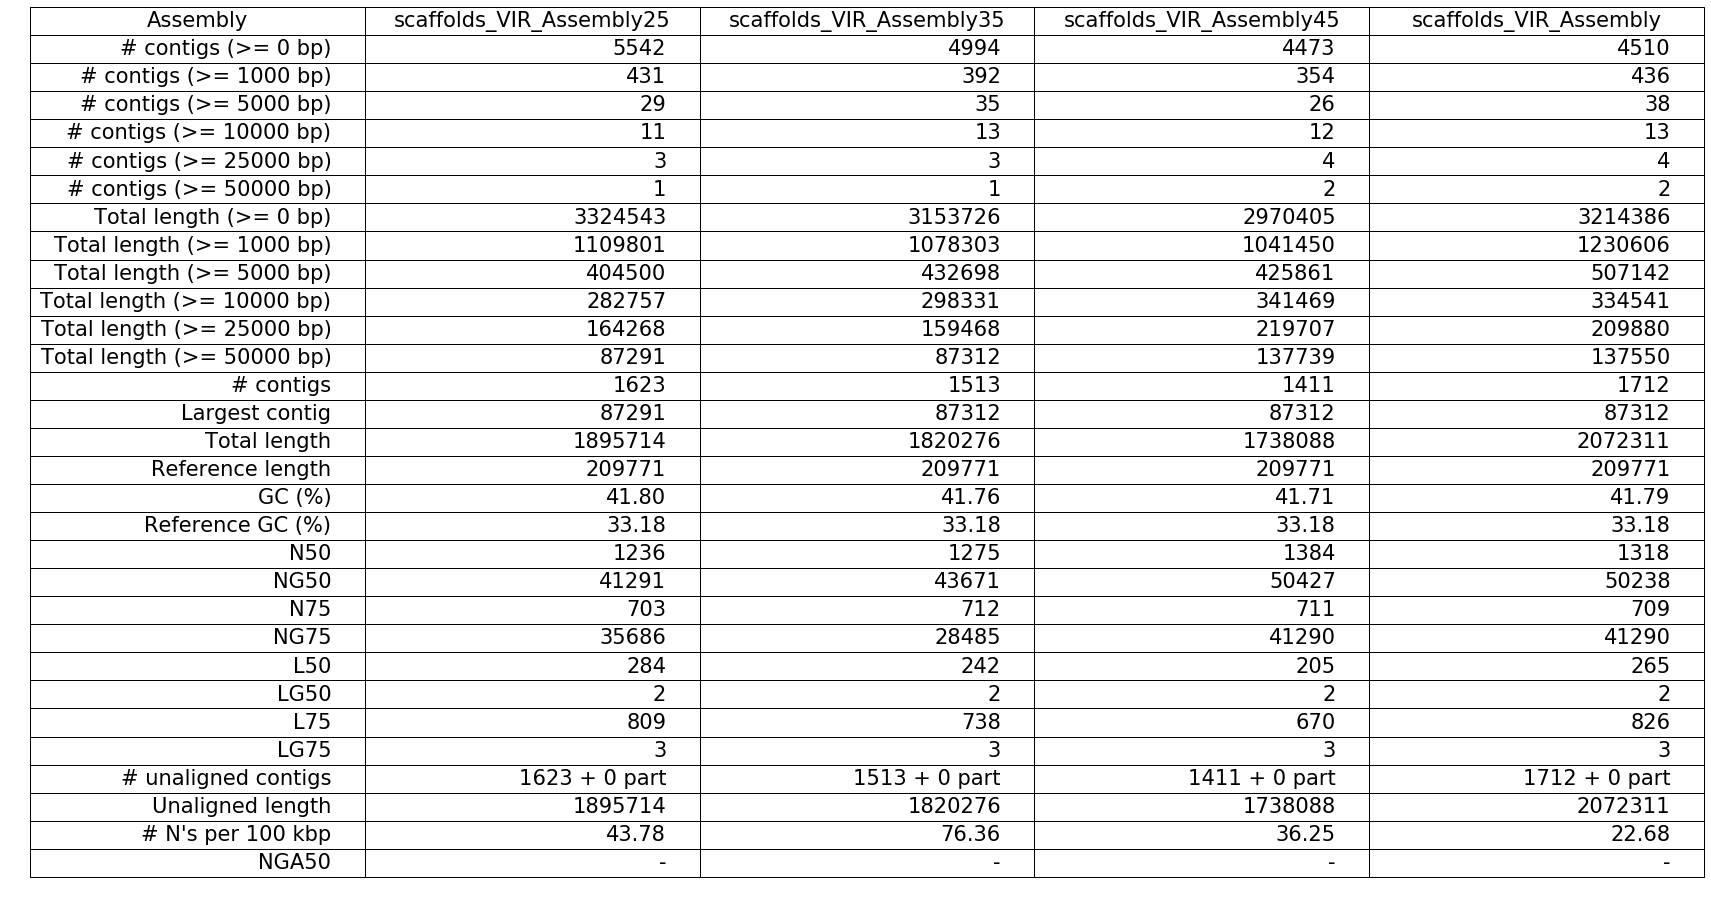

In [218]:
data = """
cat Documentos/Tema_3/kneaddata_out_%s/quast*/latest/report.tsv
EOT
""" % FILE_ID
output = !ssh microbioinf@192.168.56.101 /bin/bash <<'EOT' {data}
data = []
# To list of lists
for row in output:
    data.append(row.split('\t'))
# To dataframe
df_quast = pd.DataFrame(data[1:], columns=data[0])

df_quast_contigs = df_quast.iloc[:,0:5]
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.axis('off')
table = plt.table(cellText=df_quast_contigs.values, colLabels=df_quast_contigs.columns, 
          colWidths = [2]*len(df_quast_contigs.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

table.auto_set_font_size(False)
table.set_fontsize(21)

df_quast_scaffolds = df_quast.iloc[:,[0,5,6,7,8]]
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.axis('off')
table = plt.table(cellText=df_quast_scaffolds.values, colLabels=df_quast_scaffolds.columns, 
          colWidths = [2]*len(df_quast_scaffolds.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

table.auto_set_font_size(False)
table.set_fontsize(21)

### Assembly (*metaspades*)

#### Process for different K_MER

In [220]:
K_MERS_LIST = ["25", "35", "45"]
K_MERS =  ",".join(K_MERS_LIST)
print(K_MERS)

25,35,45


In [221]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN" "$K_MERS"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 K_MERS=$4 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
echo "#### Compute assembly with no specified K_MER"
metaspades.py -1 ${FILE_ID}_R1__kneaddata_paired_1.fastq -2 ${FILE_ID}_R1__kneaddata_paired_2.fastq \
--meta -o meta-${FILE_ID}-Assembly${K_MER} 1>/dev/null
IFS=","
for K_MER in ${K_MERS}
do
echo "#### Compute assembly K_MER=${K_MER}"
metaspades.py -1 ${FILE_ID}_R1__kneaddata_paired_1.fastq -2 ${FILE_ID}_R1__kneaddata_paired_2.fastq \
--meta -k ${K_MER} -o meta-${FILE_ID}-Assembly${K_MER} 1>/dev/null
done
EOT

#### Compute assembly with no specified K_MER
#### Compute assembly K_MER=25
#### Compute assembly K_MER=35
#### Compute assembly K_MER=45


In [222]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN" "$K_MERS"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 K_MERS=$4 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
echo "#### Spades log with no specified K_MER"
tail -15 meta-${FILE_ID}-Assembly${K_MER}/spades.log | head -n 11
echo " "
IFS=","
for K_MER in ${K_MERS}
do
echo "#### Spades log with K_MER=${K_MER}"
tail -15 meta-${FILE_ID}-Assembly${K_MER}/spades.log | head -n 11
done
EOT

#### Spades log with no specified K_MER
===== Assembling finished. Used k-mer sizes: 21, 33, 55 

 * Corrected reads are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/meta-VIR-Assembly/corrected/
 * Assembled contigs are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/meta-VIR-Assembly/contigs.fasta
 * Assembled scaffolds are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/meta-VIR-Assembly/scaffolds.fasta
 * Assembly graph is in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/meta-VIR-Assembly/assembly_graph.fastg
 * Assembly graph in GFA format is in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/meta-VIR-Assembly/assembly_graph_with_scaffolds.gfa
 * Paths in the assembly graph corresponding to the contigs are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/meta-VIR-Assembly/contigs.paths
 * Paths in the assembly graph corresponding to the scaffolds are in /home/microbioinf/Documentos/Tema_3/kneaddata_out_VIR/meta-VIR-Assembly/scaffo

In [223]:
K_MERS_LIST = ["","25", "35", "45"]
K_MERS =  ",".join(K_MERS_LIST)
print(K_MERS)

,25,35,45


In [224]:
%%bash -s "$FILE_ID" "$FASTQ_STR" "$MIN_LEN" "$K_MERS"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 FASTQ_STR=$2 MIN_LEN=$3 K_MERS=$4 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
IFS=","
for K_MER in ${K_MERS}
do
    echo
    echo "#### Check output K_MER=${K_MER}"
    cd meta-${FILE_ID}-Assembly${K_MER}
    rep -c ">" *fasta
    grep ">" -m 8 contigs.fasta 
    grep ">" -m 8 scaffolds.fasta 
    grep "NN" *fasta
done


#### Check output K_MER=
>NODE_1_length_87312_cov_12.680977
>NODE_2_length_49827_cov_8.457647
>NODE_3_length_41290_cov_6.676852
>NODE_4_length_31161_cov_5.416351
>NODE_5_length_21925_cov_9.228166
>NODE_6_length_19420_cov_25.583527
>NODE_7_length_18141_cov_10.684452
>NODE_8_length_17748_cov_24.048381
>NODE_1_length_87312_cov_12.680977
>NODE_2_length_49827_cov_8.457647
>NODE_3_length_41290_cov_6.676852
>NODE_4_length_40166_cov_9.849144
>NODE_5_length_31161_cov_5.416351
>NODE_6_length_19420_cov_25.583527
>NODE_7_length_17748_cov_24.048381
>NODE_8_length_12677_cov_11.504754
scaffolds.fasta:GAAAAGAGCTGGAAGAAGATGGTTTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
scaffolds.fasta:NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
scaffolds.fasta:NNNNNGAAGTGATCGGAAATATTTATGAGAATGAACTAGATTTGATAGTGTACGAGGCTT
scaffolds.fasta:GGTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
scaffolds.fasta:NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGCACTCATAGATTTTGC
scaffolds.fasta:GTGTCATNNNNNNNNNNNNNN

#### Comparison of assemblies (*quast*)

In [230]:
%%bash -s "$FILE_ID"
ssh microbioinf@192.168.56.101 env FILE_ID=$1 2>/dev/null /bin/bash <<"EOT"
export PATH=$PATH:/home/microbioinf/miniconda3/bin
cd Documentos/Tema_3
cd kneaddata_out_${FILE_ID}/
echo "#### Compare assemblies FILE_ID=${FILE_ID}"
for assembly in meta-${FILE_ID}-Assembly*; 
    do echo "Processing $assembly file..."; 
    cp ${assembly}/contigs.fasta m-contigs-${assembly}.fasta
    cp ${assembly}/scaffolds.fasta m-scaffolds-${assembly}.fasta
done
quast.py m-contigs* m-scaffolds* 1>/dev/null
EOT

#### Compare assemblies FILE_ID=VIR
Processing meta-VIR-Assembly file...
Processing meta-VIR-Assembly25 file...
Processing meta-VIR-Assembly35 file...
Processing meta-VIR-Assembly45 file...


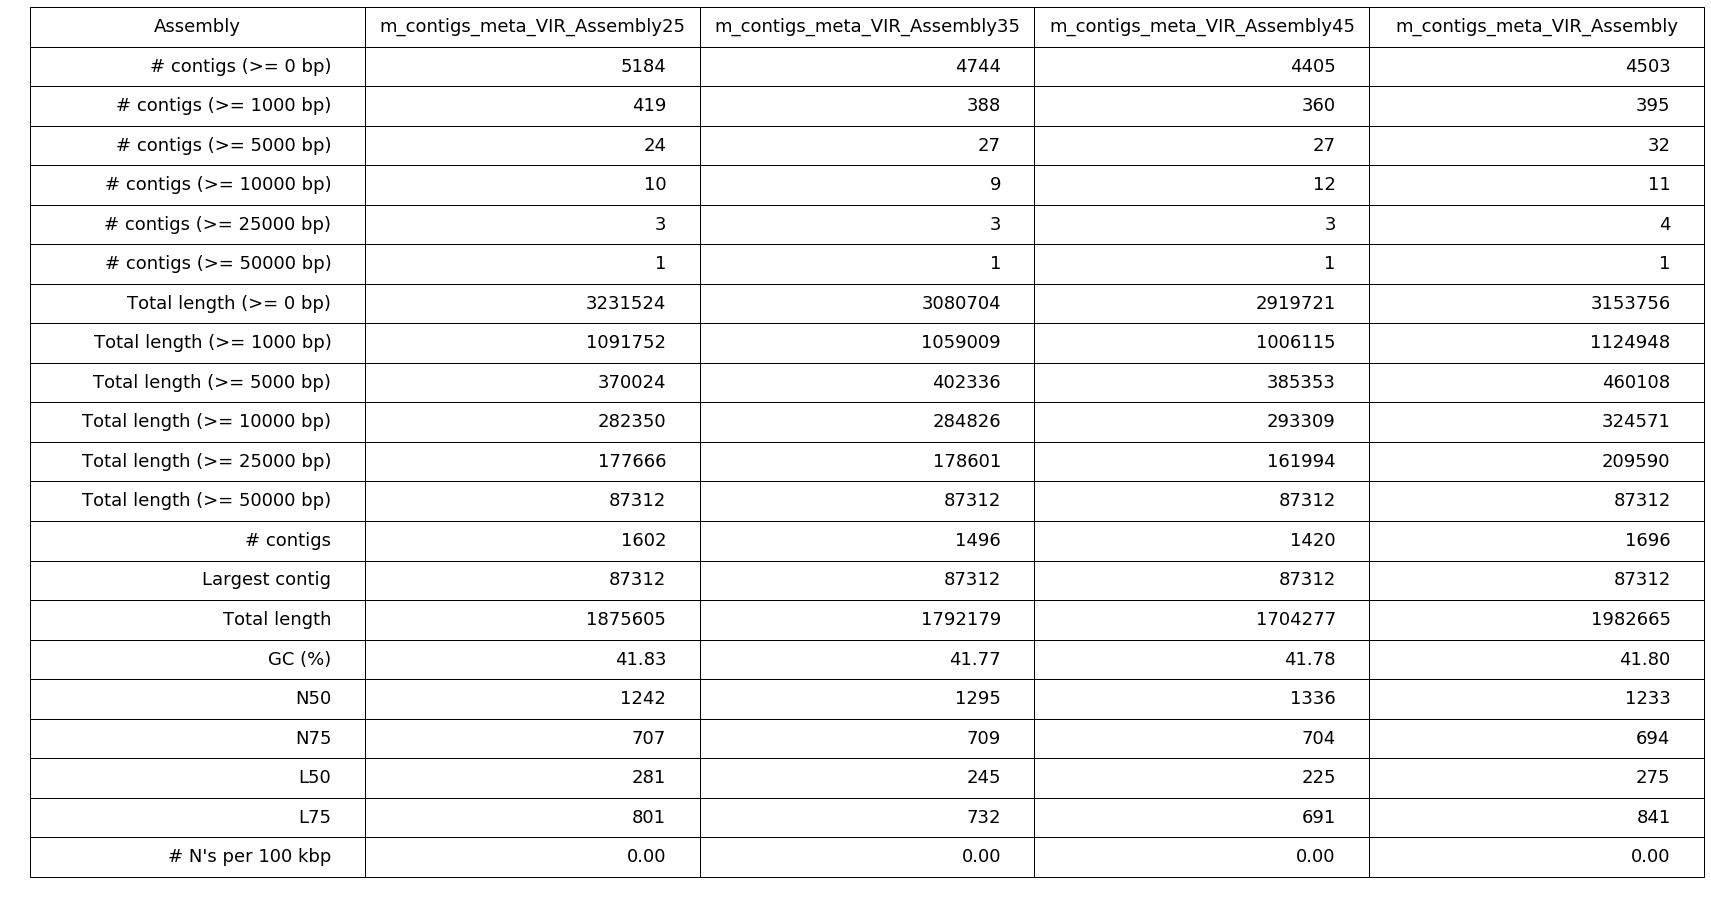

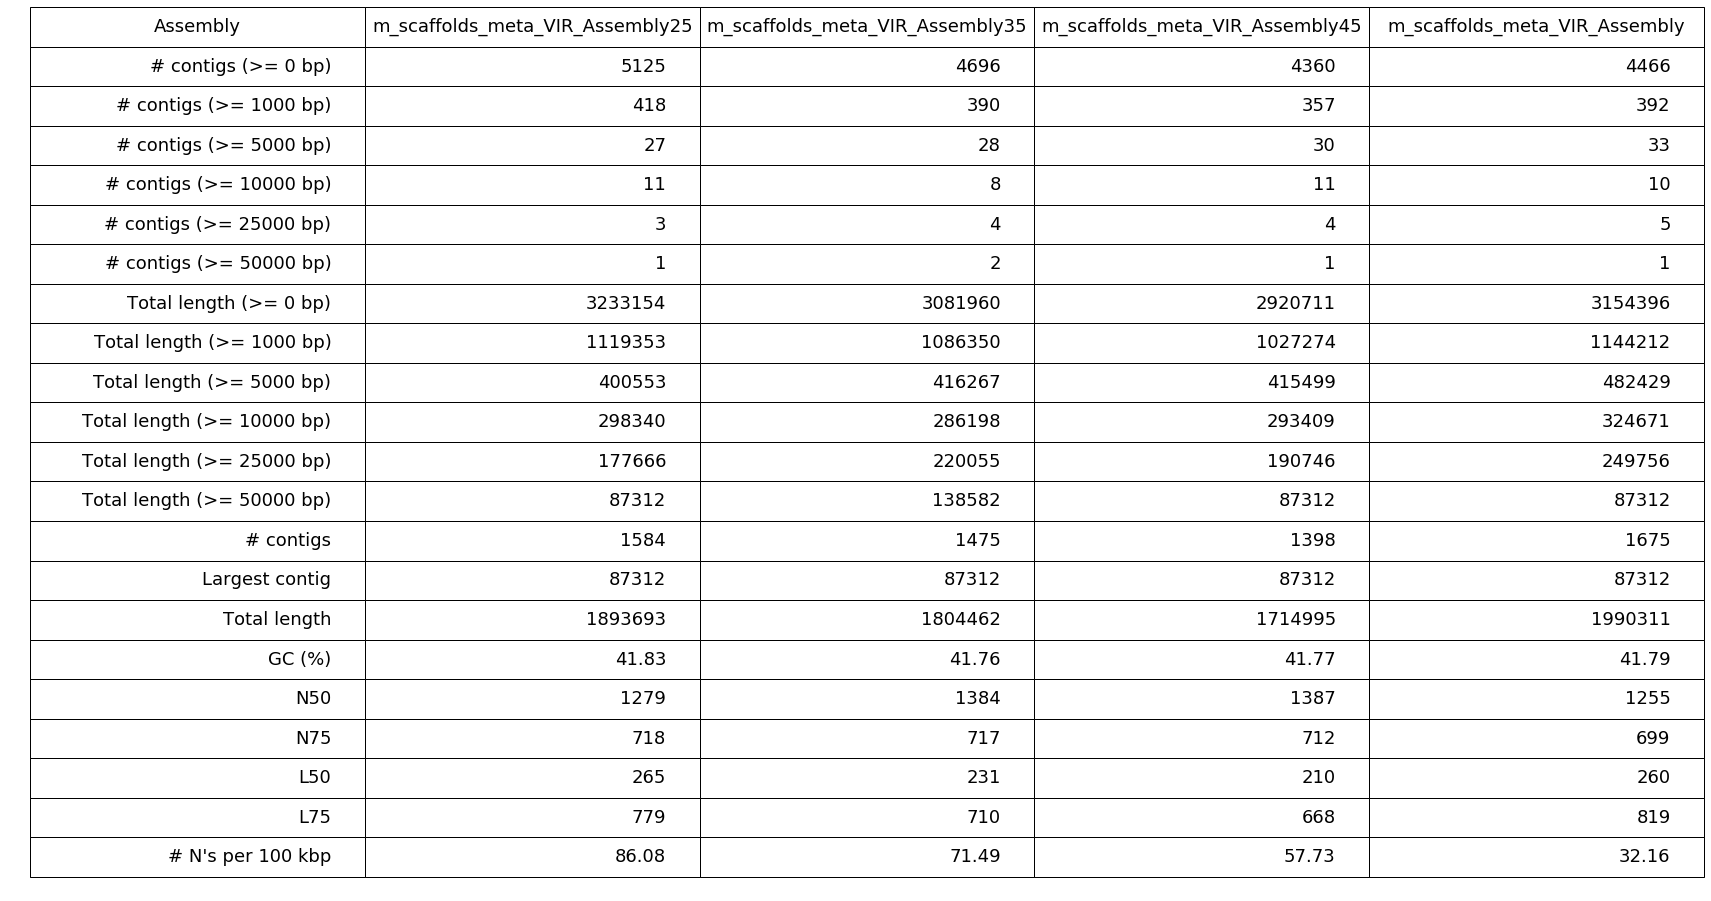

In [233]:
data = """
cat Documentos/Tema_3/kneaddata_out_%s/quast*/latest/report.tsv
EOT
""" % FILE_ID
output = !ssh microbioinf@192.168.56.101 /bin/bash <<'EOT' {data}
data = []
# To list of lists
for row in output:
    data.append(row.split('\t'))
# To dataframe
df_quast_meta = pd.DataFrame(data[1:], columns=data[0])

df_quast_contigs = df_quast_meta.iloc[:,0:5]
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.axis('off')
table = plt.table(cellText=df_quast_contigs.values, colLabels=df_quast_contigs.columns, 
          colWidths = [2]*len(df_quast_contigs.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

table.auto_set_font_size(False)
table.set_fontsize(18)

df_quast_scaffolds = df_quast_meta.iloc[:,[0,5,6,7,8]]
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.axis('off')
table = plt.table(cellText=df_quast_scaffolds.values, colLabels=df_quast_scaffolds.columns, 
          colWidths = [2]*len(df_quast_scaffolds.columns),
          loc='top',
          cellLoc = 'right', rowLoc = 'left',
          bbox=[0,0,2,2]);

table.auto_set_font_size(False)
table.set_fontsize(18)

# Outputs

In [10]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx environmental_population_analysis.ipynb
/Library/TeX/texbin/pdflatex -shell-escape environmental_population_analysis
jupyter nbconvert --to html_toc environmental_population_analysis.ipynb 1>/dev/null 2>/dev/null

This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=pdflatex)
 \write18 enabled.
entering extended mode
(./environmental_population_analysis.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/size11.clo))
(/usr/local/texlive/2018/texmf-dist/tex/latex/placeins/placeins.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/local/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty

[NbConvertApp] Converting notebook environmental_population_analysis.ipynb to latex
/Users/nandoide/miniconda3/lib/python3.7/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.2.3.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/Users/nandoide/miniconda3/lib/python3.7/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.2.3.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/Users/nandoide/miniconda3/lib/python3.7/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.2.3.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with dou

CalledProcessError: Command 'b'jupyter nbconvert --to=latex --template=~/report.tplx environmental_population_analysis.ipynb\n/Library/TeX/texbin/pdflatex -shell-escape environmental_population_analysis\njupyter nbconvert --to html_toc environmental_population_analysis.ipynb 1>/dev/null 2>/dev/null\n'' returned non-zero exit status 1.